# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/creditcard.csv', index_col = 0)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 284807 entries, 0.0 to 172792.0
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22 

In [ ]:
data[data['Class']==1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

log_reg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5) 
TreeClass = DecisionTreeClassifier()

x = data.drop(columns=['Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
def accuracy(y_real, y_pred):
  return np.where(y_pred == y_real)[0].shape[0] / y_real.shape[0]
def precision(y_real, y_pred):
    return np.where((y_pred == 1) & (y_real == 1))[0].shape[0] / np.where(y_pred == 1)[0].shape[0]
def recall(y_real, y_pred):
    return np.where((y_pred == 1) & (y_real == 1))[0].shape[0] / np.where(y_real == 1)[0].shape[0]
def F1(y_real, y_pred):
  precision = np.where((y_pred == 1) & (y_real == 1))[0].shape[0] / np.where(y_pred == 1)[0].shape[0]
  recall = np.where((y_pred == 1) & (y_real == 1))[0].shape[0] / np.where(y_real == 1)[0].shape[0]
  return (2*precision*recall)/(precision+recall)
def Metrics(y_test,y_pred,y_pred_proba):
  print('accuracy =',accuracy(y_test,y_pred),
  'precision =',precision(y_test,y_pred),
  'recall =',recall(y_test, y_pred),
  'F1 =',F1(y_test, y_pred),
  'roc_auc_score =',roc_auc_score(y_test, y_pred_proba))
  plt.figure(figsize=(7, 7))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  plt.plot(fpr, tpr, 'b', linewidth=3)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot([0, 0], [0, 1], 'k')
  plt.plot([1, 1], [0, 1], 'k')
  plt.plot([0, 1], [0, 0], 'k')
  plt.plot([0, 1], [1, 1], 'k')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.xlim((0, 1))
  plt.ylim((0, 1))
  plt.axis('equal')
  plt.title('ROC curve')
  plt.show()

In [ ]:
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

accuracy = 0.9991456292499094 precision = 0.8297872340425532 recall = 0.5777777777777777 F1 = 0.6812227074235807 roc_auc_score = 0.9673464691774813


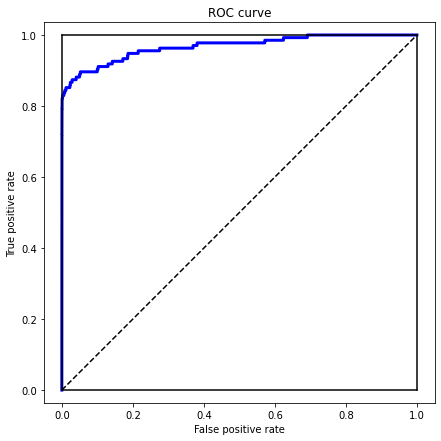

In [ ]:
Metrics(y_test,y_pred,y_pred_proba)

In [ ]:
TreeClass.fit(X_train, y_train)
y_pred = TreeClass.predict(X_test)
y_pred_proba = TreeClass.predict_proba(X_test)[:, 1]

accuracy = 0.9991456292499094 precision = 0.7246376811594203 recall = 0.7407407407407407 F1 = 0.7326007326007326 roc_auc_score = 0.8701476479996665


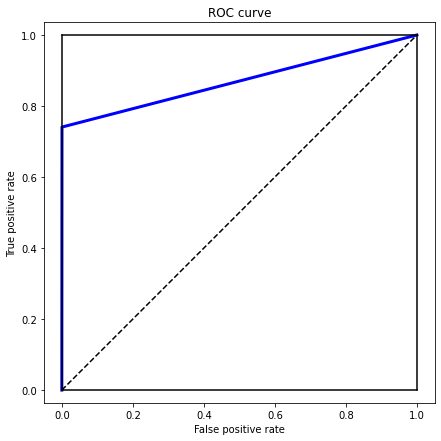

In [ ]:
Metrics(y_test,y_pred,y_pred_proba)

In [ ]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

accuracy = 0.9992392589211521 precision = 0.8888888888888888 recall = 0.5925925925925926 F1 = 0.711111111111111 roc_auc_score = 0.8812799893718448


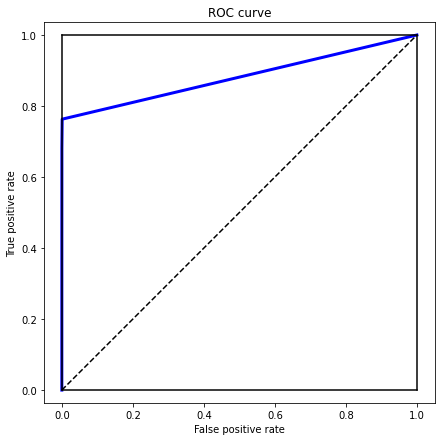

In [ ]:
Metrics(y_test,y_pred_knn,y_pred_proba_knn)

Построил KNN, Tree и Linerlog

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

**Я выбираю метрику recall исходя из того что, на мой взгляд, код должен стремиться находить не только всех мошенников, но и не банить обычных пользователей. Recall будет определять отношение правильно определенных мошенников ко всему классу определеленных мошенников, поэтому, максимизируя это соотношение, мы будем уменьшать ошибку и не доставлять вреда обычным клиентам**

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [ ]:
from sklearn.metrics import recall_score
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


In [ ]:
recall_score(y_test,y_pred)

0.5777777777777777

In [ ]:
recalls_knn = []
recalls_log = []
recalls_tree = []
from sklearn.metrics import fbeta_score

weights = range(1, 21)
for i in weights:
  log_reg_w = LogisticRegression(class_weight={0:1, 1:i}, max_iter=1000)
  log_reg_w.fit(X_train, y_train)
  y_pred = log_reg_w.predict(X_test)
  cur_recall = recall(y_test, y_pred)
  recalls_log.append(cur_recall)

  knn = KNeighborsClassifier(n_neighbors=i) 
  knn.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)
  cur_recall = recall(y_test, y_pred_knn)
  recalls_knn.append(cur_recall)


  TreeClass = DecisionTreeClassifier(max_depth=i)
  TreeClass.fit(X_train, y_train)
  y_pred = TreeClass.predict(X_test)
  cur_recall = recall(y_test, y_pred)
  recalls_tree.append(cur_recall)

plt.plot(weights, recalls_knn)
plt.plot(weights, recalls_log)
plt.plot(weights, recalls_tree)
plt.legend(['recalls_knn', 'recalls_log','recalls_tree'])
plt.show()

Перебирал веса в logreg, перебирал число ближайших соседей в knn и глубину дерева в tree

---



# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

**Выбрал датасет качества вина, надеюсь ни с кем не повторится, менял в датасете колонку цвета вместо карсное-белое: 1 и 0, в качестве целевой переменной выбрал columns='quality', результаты приведены ниже**



In [ ]:
df_wine = pd.read_csv('/content/winequality.csv')

In [ ]:
df_wine['red'] = list(map(lambda x: 1 if x=='red' else 0, df_wine['color']))
df_wine['white'] = list(map(lambda x: 0 if x=='red' else 1, df_wine['color']))

In [ ]:
df_wine = df_wine.drop(columns='color')

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  red                   6497 non-null   int64  
 14  white                 6497 non-null   int64  
dtypes: float64(11), int64

In [ ]:
df_wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

**Распределение по классам (не очень хорошее по классам в плане колличества, что, на мой взгляд, скажется на доле правильных ответов)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


X = df_wine.drop(columns='quality')
y = df_wine.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

**Взял аналогично линейную, кнн и деревья**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Log_reg = LogisticRegression()
KNN = KNeighborsClassifier(n_neighbors=5) 
TreeClass = DecisionTreeClassifier()

In [ ]:
def MetricsNB(y_test,y_pred):
  print('accuracy =',accuracy_score(y_test,y_pred),
  'precision_macro =',precision_score(y_test,y_pred,average='macro'),
  'precision_micro =',precision_score(y_test,y_pred,average='micro'),
  'recall_macro =',recall_score(y_test, y_pred,average='macro'),
  'recall_micro =',recall_score(y_test, y_pred,average='micro'),
  'F1_macro =',f1_score(y_test, y_pred,average='macro'),
  'F1_micro =',f1_score(y_test, y_pred,average='micro'))

In [ ]:
Log_reg.fit(X_train,y_train)
y_pred_log = Log_reg.predict(X_test)
MetricsNB(y_test,y_pred_log)

accuracy = 0.6030769230769231 precision_macro = 0.27618378325837967 precision_micro = 0.6030769230769231 recall_macro = 0.2819430319301071 recall_micro = 0.6030769230769231 F1_macro = 0.2780925488856844 F1_micro = 0.6030769230769231


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
KNN.fit(X_train,y_train)
y_pred_knn = KNN.predict(X_test)
MetricsNB(y_test,y_pred_knn)

accuracy = 0.5076923076923077 precision_macro = 0.32560333979819844 precision_micro = 0.5076923076923077 recall_macro = 0.25145944908271367 recall_micro = 0.5076923076923077 F1_macro = 0.26834597665484977 F1_micro = 0.5076923076923077


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
TreeClass.fit(X_train,y_train)
y_pred_tree = TreeClass.predict(X_test)
MetricsNB(y_test,y_pred_log)

accuracy = 0.6030769230769231 precision_macro = 0.27618378325837967 precision_micro = 0.6030769230769231 recall_macro = 0.2819430319301071 recall_micro = 0.6030769230769231 F1_macro = 0.2780925488856844 F1_micro = 0.6030769230769231


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

**Из спортивного интереса максимизировал по precision и recall логрег, tree и кнн**
**Первую изменял по весам  классов, заданным словарем**
**Вторую изменял глубину**
**Третью менял число ближайших соседов**

**Ответ выводится как print(max_prc,max_tcl) с соответсвующими значениями параметров**

**После перебора значения параметров значительно выросли, целей обился, хотя глобально модели не обладают достаточной точностью ( *достаточной для прода:)* )**

**Это можно исправить, найдя более качественный датасет, либо исключив малые классы, либо определя дополнительные признаки**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

[0.4533274197760968, 1, 7] [0.3853185218881176, 0, 14]


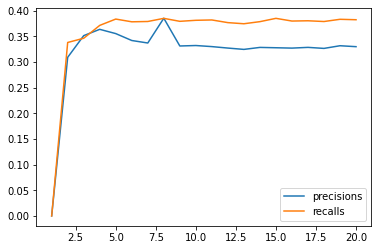

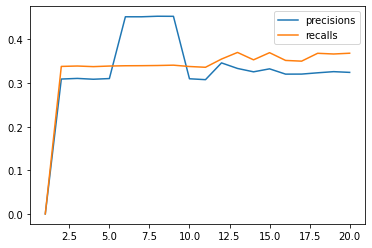

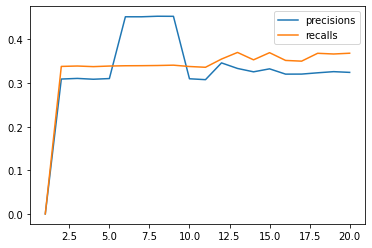

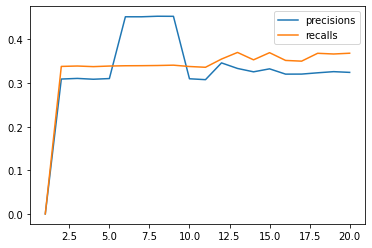

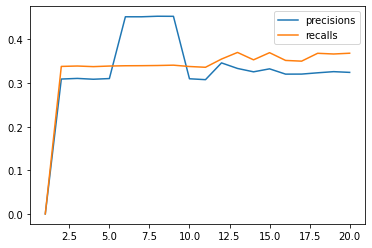

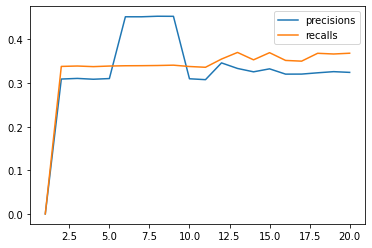

In [ ]:
precisions=np.zeros([40,40])
max_prc=[0,0,0]
recalls=np.zeros([40,40])
max_tcl=[0,0,0]

weights = range(1, 21)

for j in weights:
  for i in range(6):
    dict_class = {3:j, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1}
    dict_class[2] = dict_class.pop(4+i)
    dict_class[i+4] = dict_class[i+3]
    dict_class[i+3] = dict_class.pop(2)
    log_reg_w = LogisticRegression(class_weight=dict_class, max_iter=10000)
    log_reg_w.fit(X_train, y_train)
    y_pred = log_reg_w.predict(X_test)
    precisions[i][j]=precision_score(y_test, y_pred, average='macro')
    recalls[i][j]=recall_score(y_test, y_pred, average='macro')
    if precisions[i][j] > max_prc[0]:
      max_prc = [precisions[i][j],i,j]
    if recalls[i][j] > max_tcl[0]:
      max_tcl = [recalls[i][j],i,j]
print(max_prc,max_tcl)
for i in range (6):
  plt.plot(weights, precisions[i][:20])
  plt.plot(weights, recalls[i][:20])
  plt.legend(['precisions', 'recalls'])
  plt.show()




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

[0.44393509498760075, 4, 1] [0.44372436454024466, 0, 20]


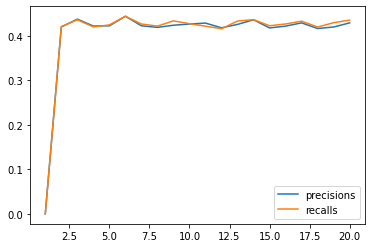

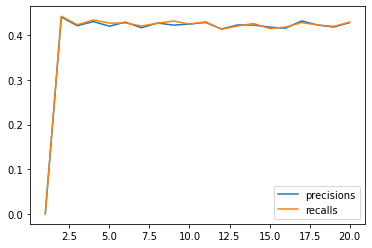

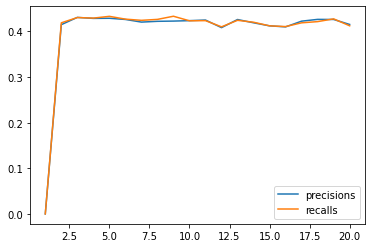

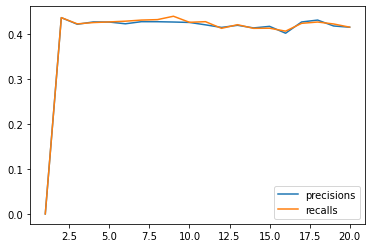

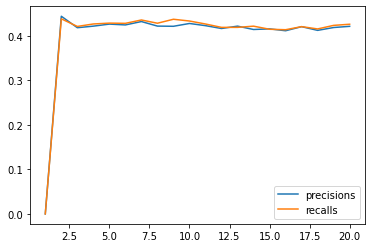

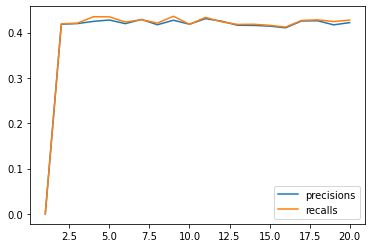

In [ ]:
precisions=np.zeros([40,40])
max_prc=[0,0,0]
recalls=np.zeros([40,40])
max_tcl=[0,0,0]

weights = range(1, 21)

for j in weights:
  for i in range(6):
    dict_class = {3:j, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1}
    dict_class[2] = dict_class.pop(4+i)
    dict_class[i+4] = dict_class[i+3]
    dict_class[i+3] = dict_class.pop(2)
    TreeClass = DecisionTreeClassifier(max_depth=20,class_weight=dict_class)
    TreeClass.fit(X_train, y_train)
    y_pred = TreeClass.predict(X_test)
    precisions[i][j]=precision_score(y_test, y_pred, average='macro')
    recalls[i][j]=recall_score(y_test, y_pred, average='macro')
    if precisions[i][j] > max_prc[0]:
      max_prc = [precisions[i][j],i,j]
    if recalls[i][j] > max_tcl[0]:
      max_tcl = [recalls[i][j],i,j]
print(max_prc,max_tcl)
for i in range (6):
  plt.plot(weights, precisions[i][:20])
  plt.plot(weights, recalls[i][:20])
  plt.legend(['precisions', 'recalls'])
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

[0.47445096442157253, 1, 11] [0.44241214887876706, 1, 18]


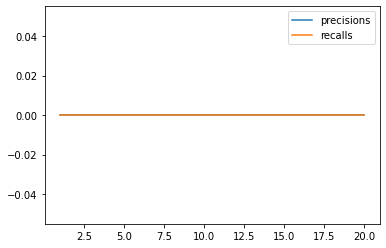

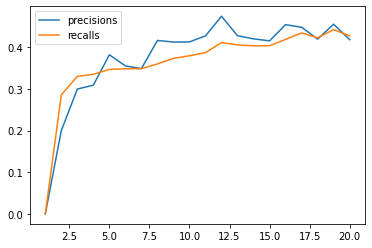

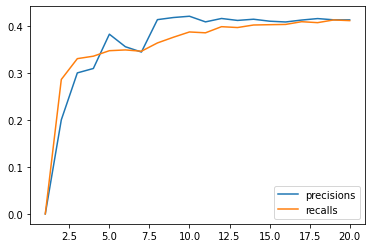

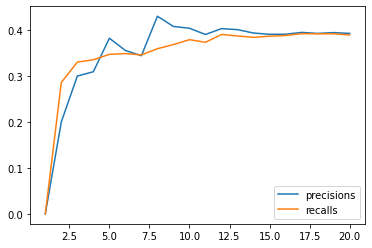

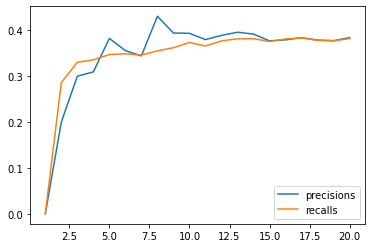

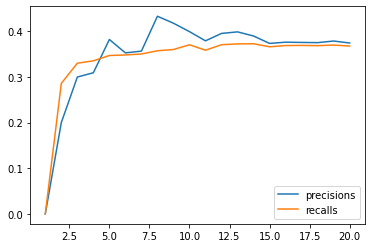

In [ ]:
precisions=np.zeros([40,40])
max_prc=[0,0,0]
recalls=np.zeros([40,40])
max_tcl=[0,0,0]

weights = range(1, 21)

for j in weights:
  for i in range(1,11):
    TreeClass = DecisionTreeClassifier(max_depth=j,min_samples_leaf=i)
    TreeClass.fit(X_train, y_train)
    y_pred = TreeClass.predict(X_test)
    precisions[i][j]=precision_score(y_test, y_pred, average='macro')
    recalls[i][j]=recall_score(y_test, y_pred, average='macro')
    if precisions[i][j] > max_prc[0]:
      max_prc = [precisions[i][j],i,j]
    if recalls[i][j] > max_tcl[0]:
      max_tcl = [recalls[i][j],i,j]
print(max_prc,max_tcl)
for i in range (6):
  plt.plot(weights, precisions[i][:20])
  plt.plot(weights, recalls[i][:20])
  plt.legend(['precisions', 'recalls'])
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

[0.5386225258283531, 1, 19] [0.343383088568774, 0, 1]


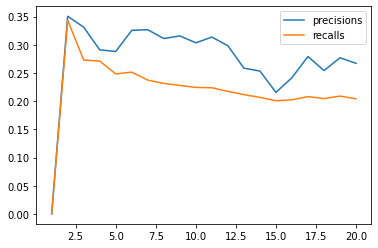

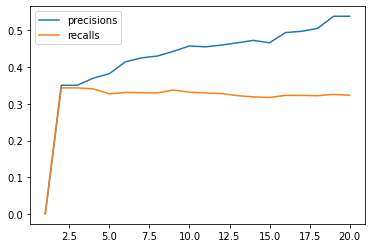

In [ ]:
precisions=np.zeros([40,40])
max_prc=[0,0,0]
recalls=np.zeros([40,40])
max_tcl=[0,0,0]

weightsl = ['uniform','distance']

for j in range(1, 21):
  for i in [0,1]:
    KNN = KNeighborsClassifier(n_neighbors=j,weights=weightsl[i])
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    precisions[i][j]=precision_score(y_test, y_pred, average='macro')
    recalls[i][j]=recall_score(y_test, y_pred, average='macro')
    if precisions[i][j] > max_prc[0]:
      max_prc = [precisions[i][j],i,j]
    if recalls[i][j] > max_tcl[0]:
      max_tcl = [recalls[i][j],i,j]
print(max_prc,max_tcl)
for i in range (2):
  plt.plot(weights, precisions[i][:20])
  plt.plot(weights, recalls[i][:20])
  plt.legend(['precisions', 'recalls'])
  plt.show()

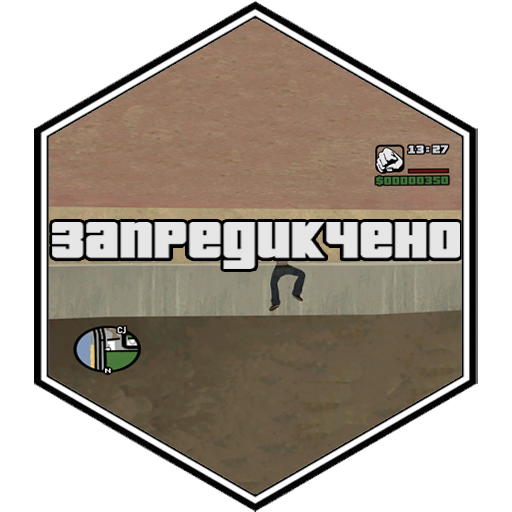